In [1]:
# %pip install mplcyberpunk
%pip install ruts
%pip install shap
%pip install pymystem3

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install slovnet

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install evaluate
%pip install rouge_score

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install crosslingual-coreference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.2/248.2 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.2/594.2 kB 26.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.2/463.2 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [4]:
%pip install spacy
%pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.7.0/ru_core_news_sm-3.7.0.tar.gz

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 6.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
# import mplcyberpunk
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from pymystem3 import Mystem
from tqdm import tqdm
import csv

from ruts import BasicStats, ReadabilityStats, DiversityStats
from dataclasses import dataclass, field
from typing import List

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
russian_stopwords = set(stopwords.words('russian'))

from navec import Navec
from slovnet import NER, Morph
from razdel import sentenize, tokenize

from evaluate import load

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/irinanovikova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/irinanovikova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
plt.style.use("cyberpunk")

OSError: 'cyberpunk' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## **Preprocessing**

In [8]:
equal_themes_df = pd.read_csv('essays/academic_essays.csv', encoding='utf-8')
different_themes_df = pd.read_csv('essays/academic_essays_with_different_themes.csv', encoding='utf-8')

In [9]:
equal_themes_df.info(), different_themes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   topic               1485 non-null   object
 1   human-written text  1485 non-null   object
 2   prompt              1485 non-null   object
 3   neural text         1485 non-null   object
dtypes: object(4)
memory usage: 46.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   topic               743 non-null    object
 1   human-written text  743 non-null    object
 2   prompt              743 non-null    object
 3   neural text         743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB


(None, None)

In [10]:
equal_themes_df.head()

,topic,human-written text,prompt,neural text
0,"Анализ проблемы популярной культуры, воспроизв...","\nГоворя о современной культуре, мы зачастую п...","Напиши человекоподобное эссе по данной теме: ""...","В течение нескольких десятилетий, популярная к..."
1,Модель Портера,\n\nДанное эссе посвящено известной модели Пор...,"Напиши человекоподобное эссе по данной теме: ""...","В современном мире бизнеса, модель Портера явл..."
2,В чем смысл жизни,\n Жизнь имеет в точности ту це...,"Напиши человекоподобное эссе по данной теме: ""...",В чем смысл жизни? Этот вопрос мучает и волнуе...
3,Человек. Техника. Природа. Проблема взаимодейс...,\nВлияние техники на человека и ...,"Напиши человекоподобное эссе по данной теме: ""...",Человек. Техника. Природа. Проблема взаимодейс...
4,Эвтаназия. Право человека на уход из жизни,\n Право человека\nна жизнь и достойное сущ...,"Напиши человекоподобное эссе по данной теме: ""...",Эвтаназия. Право человека на уход из жизни\n\n...


In [11]:
different_themes_df.head()

,topic,human-written text,prompt,neural text
0,«Всякая истина рождается как ересь и умирает к...,Английский учёный-агностик XIX века Томас Генр...,"Напиши человекоподобное эссе по данной теме: ""...","В течение нескольких десятилетий, популярная к..."
1,«Я не хочу обносить стенами свой дом или зак...,Индийский писатель и поэт Рабиндранат Тагор го...,"Напиши человекоподобное эссе по данной теме: ""...","В современном мире бизнеса, модель Портера явл..."
2,«Отношение Ницше к христианству»,Он усвоил мотивы всех своих предшественников в...,"Напиши человекоподобное эссе по данной теме: ""...",В чем смысл жизни? Этот вопрос мучает и волнуе...
3,«Значение и роль информации в развитии совреме...,"Так, автор выделил ряд критериев, на которые о...","Напиши человекоподобное эссе по данной теме: ""...",Человек. Техника. Природа. Проблема взаимодейс...
4,«Что вы считаете прекрасным и почему?»,Почему же именно любовь? Адам Дж. Джексон сказ...,"Напиши человекоподобное эссе по данной теме: ""...",Эвтаназия. Право человека на уход из жизни\n\n...


In [12]:
lengths_human_texts = [len(text.split(' ')) for text in equal_themes_df['human-written text']]
lengths_neural_texts = [len(text.split(' ')) for text in equal_themes_df['neural text']]
np.mean(lengths_human_texts), np.mean(lengths_neural_texts)

(754.4262626262627, 347.55488215488214)

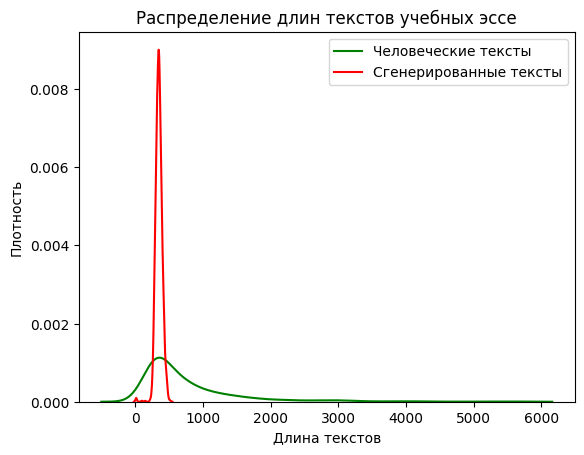

In [13]:
sns.kdeplot(lengths_human_texts, color='green', label='Человеческие тексты')
sns.kdeplot(lengths_neural_texts, color='red', label='Сгенерированные тексты')
plt.xlabel('Длина текстов')
plt.ylabel('Плотность')
plt.title('Распределение длин текстов учебных эссе')
plt.legend()
plt.savefig('text_lengths_distribution')
plt.show()

In [14]:
class DatasetPreprocessor:
    def __init__(self, dataframe, source: str, target: str):
        self.df = dataframe
        self.source_column = source
        self.target_column = target

    def analyse_dataset(self):
        print(self.df.head())
        print(self.df.info())
        print(f'Shape: {self.df.shape}')
        print(f'Number of NaN: {self.df.isnull().sum()}')
        print(f'Number of duplicates: {self.df.duplicated().sum()}')

    def basic_preprocess(self):
        self.df.dropna(axis=0, inplace=True)
        self.df.drop_duplicates(f'{self.source_column}', inplace=True)
        self.df.drop_duplicates(f'{self.target_column}', inplace=True)
        self.df.reset_index(inplace=True, drop=True)
        return self.df

    def remove_garbage(self, text: str):
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'\n', '', text)
        return text

In [15]:
preprocessor_equal = DatasetPreprocessor(equal_themes_df, 'human-written text', 'neural text')
processed_equal_df = preprocessor_equal.basic_preprocess()

cleaned_human_equal = [preprocessor_equal.remove_garbage(text) for text in processed_equal_df['human-written text']]
human_equal = {'text': cleaned_human_equal, 'class': 0}
human_equal_df = pd.DataFrame(human_equal)

cleaned_neural_equal = [preprocessor_equal.remove_garbage(text) for text in processed_equal_df['neural text']]
neural_equal = {'text': cleaned_neural_equal, 'class': 1}
neural_equal_df = pd.DataFrame(neural_equal)

equal_df = pd.concat([human_equal_df, neural_equal_df])
equal_df.head()

,text,class
0,"Говоря о современной культуре, мы зачастую по...",0
1,Данное эссе посвящено известной модели Портер...,0
2,"Жизнь имеет в точности ту ценность, которой м...",0
3,Влияние техники на человека и общество в цело...,0
4,Право человека на жизнь и достойное существов...,0


In [16]:
preprocessor_different = DatasetPreprocessor(different_themes_df, 'human-written text', 'neural text')
processed_different_df = preprocessor_different.basic_preprocess()

cleaned_human_equal = [preprocessor_different.remove_garbage(text) for text in processed_different_df['human-written text']]
human_different = {'text': cleaned_human_equal, 'class': 0}
human_different_df = pd.DataFrame(human_different)

cleaned_neural_different = [preprocessor_different.remove_garbage(text) for text in processed_different_df['neural text']]
neural_different = {'text': cleaned_neural_different, 'class': 1}
neural_different_df = pd.DataFrame(neural_different)

different_df = pd.concat([human_different_df, neural_different_df])
different_df.head()

,text,class
0,Английский учёный-агностик XIX века Томас Генр...,0
1,Индийский писатель и поэт Рабиндранат Тагор го...,0
2,Он усвоил мотивы всех своих предшественников в...,0
3,"Так, автор выделил ряд критериев, на которые о...",0
4,Почему же именно любовь? Адам Дж. Джексон сказ...,0


In [17]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2910 entries, 0 to 1454
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2910 non-null   object
 1   class   2910 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 0 to 739
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1480 non-null   object
 1   class   1480 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.7+ KB


(None, None)

In [18]:
long_mask_different = different_df['text'].apply(lambda x: len(x.split(' ')) >= 2000)
different_df = different_df[~long_mask_different]

small_mask_different = different_df['text'].apply(lambda x: len(x.split(' ')) <= 200)
different_df = different_df[~small_mask_different]

different_df.reset_index(inplace=True, drop=True)

long_mask_equal = equal_df['text'].apply(lambda x: len(x.split(' ')) >= 2000)
equal_df = equal_df[~long_mask_equal]

small_mask_equal = equal_df['text'].apply(lambda x: len(x.split(' ')) <= 200)
equal_df = equal_df[~small_mask_equal]

equal_df.reset_index(inplace=True, drop=True)

In [19]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2709 non-null   object
 1   class   2709 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1356 non-null   object
 1   class   1356 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 21.3+ KB


(None, None)

## **Bigrams and trigrams**

In [29]:
def get_word_corpus(df):
    corpus = []
    for text in df.text:
        text = [token.lower() for token in text.split() if token.isalpha()]
        corpus.extend(text)
    return corpus

In [132]:
def get_n_grams(corpus, n_gram_size): 
    n_grams = []
    for ind in range(len(corpus) - n_gram_size + 1):
        n_grams.append(corpus[ind:ind + n_gram_size])
    return tuple(n_grams)

In [133]:
def get_probabilities(n_grams):
    n_gram_counts = {}
    for n_gram in n_grams:
        n_gram_counts[n_gram] = n_gram_counts.get(n_gram, 0) + 1

    base_ngram_counts = {}
    for ngram, freq in n_gram_counts.items():
        base_ngram_counts[ngram[:-1]] = base_ngram_counts.get(ngram[:-1], 0) + freq

    n_gram_frequencies = {ngram: freq / base_ngram_counts[ngram[:-1]]
                                    for ngram, freq in n_gram_counts.items()}
    return n_gram_frequencies

In [135]:
human_df = equal_df[equal_df["class"] == 0]
neural_df = equal_df[equal_df["class"] == 1]

In [157]:
bigram_probs_human = get_probabilities(get_n_grams(tuple(get_word_corpus(human_df)), 2))
bigram_probs_neural = get_probabilities(get_n_grams(tuple(get_word_corpus(neural_df)), 2))

In [158]:
list(bigram_probs_neural.items())[:10]

[(('в', 'течение'), 0.004054146911289768),
 (('течение', 'нескольких'), 0.06666666666666667),
 (('нескольких', 'популярная'), 0.043478260869565216),
 (('популярная', 'культура'), 1.0),
 (('культура', 'стала'), 0.013793103448275862),
 (('стала', 'важной'), 0.01),
 (('важной', 'сферой'), 0.007874015748031496),
 (('сферой', 'в'), 0.2857142857142857),
 (('в', 'нашей'), 0.019995877138734283),
 (('нашей', 'она'), 0.03996366939146231)]

In [145]:
list(bigram_probs_human.items())[:10]

[(('данное', 'эссе'), 0.011904761904761904),
 (('эссе', 'посвящено'), 0.020833333333333332),
 (('посвящено', 'известной'), 0.058823529411764705),
 (('известной', 'модели'), 0.058823529411764705),
 (('модели', 'описанной'), 0.013513513513513514),
 (('описанной', 'им'), 0.14285714285714285),
 (('им', 'в'), 0.06601941747572816),
 (('в', 'в'), 0.011577258138468592),
 (('в', 'данной'), 0.0024835702277242857),
 (('данной', 'работе'), 0.04245283018867924)]

In [148]:
trigram_probs_human = get_probabilities(get_n_grams(tuple(get_word_corpus(human_df)), 3))
trigram_probs_neural = get_probabilities(get_n_grams(tuple(get_word_corpus(neural_df)), 3))

In [126]:
from scipy.stats import ks_2samp

In [147]:
# Kolmogorov-Smirnov bigrams 
ks_2samp(list(bigram_probs_human.values()), list(bigram_probs_neural.values()))

KstestResult(statistic=0.031312792907284726, pvalue=1.2432014292485e-107, statistic_location=0.07954545454545454, statistic_sign=-1)

In [149]:
ks_2samp(list(trigram_probs_human.values()), list(trigram_probs_neural.values()))

KstestResult(statistic=0.13398908906808243, pvalue=0.0, statistic_location=0.66, statistic_sign=-1)

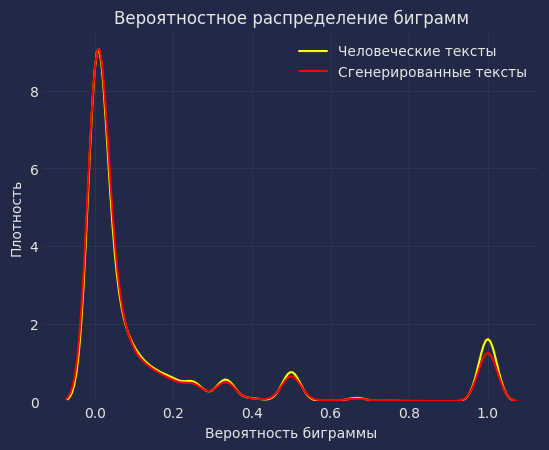

In [167]:
sns.kdeplot(list(bigram_probs_human.values()), color='yellow', label='Человеческие тексты')
sns.kdeplot(list(bigram_probs_neural.values()), color='red', label='Сгенерированные тексты')
plt.xlabel('Вероятность биграммы')
plt.ylabel('Плотность')
plt.title('Вероятностное распределение биграмм')
plt.legend()
plt.show()

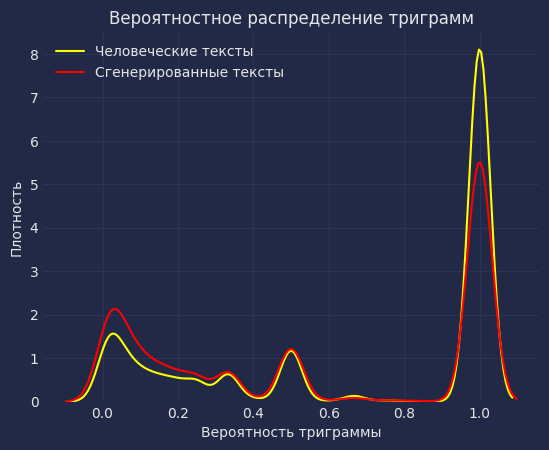

In [181]:
sns.kdeplot(np.array(list(trigram_probs_human.values())), color='yellow', label='Человеческие тексты')
sns.kdeplot(np.array(list(trigram_probs_neural.values())), color='red', label='Сгенерированные тексты')
plt.xlabel('Вероятность триграммы')
plt.ylabel('Плотность')
plt.title('Вероятностное распределение триграмм')
plt.legend()
plt.show()

## **Letter bigrams and trigrams**

In [30]:
def get_word_corpus(df):
    corpus = []
    for text in df.text:
        text = [token.lower() for token in text if token.isalpha()]
        corpus.append(text)
    return corpus

def get_ngrams_distribution(df, corpus, n_gram_size): 
    n_grams = {index: [] for index in range(len(df.text))}
    for index in range(len(df.text)): 
        current_corpus = corpus[index]
        for ind in range(len(current_corpus) - n_gram_size + 1): 
            n_grams[index].append(current_corpus[ind:ind + n_gram_size])
    return n_grams

def get_probabilities(df, n_grams_corpus):
    n_gram_counts = {index: [] for index in range(len(df.text))}
    for index in range(len(df.text)): 
        one_text_ngrams = n_grams_corpus[index]
        one_text_n_grams_count = {}
        for n_gram in one_text_ngrams: 
            one_text_n_grams_count[tuple(n_gram)] = one_text_n_grams_count.get(tuple(n_gram), 0) + 1
        
        one_text_base_ngram_counts = {}
        for ngram, freq in one_text_n_grams_count.items():
            one_text_base_ngram_counts[tuple(ngram[:-1])] = one_text_base_ngram_counts.get(tuple(ngram[:-1]), 0) + freq

        one_text_n_gram_frequencies = {tuple(ngram): freq / one_text_base_ngram_counts[tuple(ngram[:-1])]
                                    for ngram, freq in one_text_n_grams_count.items()}
        
        n_gram_counts[index] = one_text_n_gram_frequencies.values()

    return n_gram_counts

In [31]:
equal_corpus = get_word_corpus(equal_df)
different_corpus = get_word_corpus(different_df)

In [48]:
equal_bigrams = get_ngrams_distribution(equal_df, equal_corpus, 2)
different_bigrams = get_ngrams_distribution(different_df, different_corpus, 2)

In [ ]:
equal_trigrams = get_ngrams_distribution(equal_df, equal_corpus, 3)
different_trigrams = get_ngrams_distribution(different_df, different_corpus, 3)

In [56]:
equal_probabilities_bigrams = get_probabilities(equal_df, list(equal_bigrams.values()))
equal_probabilities_trigrams = get_probabilities(equal_df, list(equal_trigrams.values()))

different_probabilities_bigrams = get_probabilities(different_df, list(different_bigrams.values()))
different_probabilities_trigrams = get_probabilities(different_df, list(different_trigrams.values()))

In [ ]:
from scipy.stats import ks_2samp, entropy

In [ ]:
# entropy for bigrams 
entropy(list(bigram_probs_human.values())), entropy(list(bigram_probs_neural.values()))

In [ ]:
# Kolmogorov-Smirnov bigrams 
ks_2samp(list(bigram_probs_human.values()), list(bigram_probs_neural.values()))

## **Basic statistics**

In [20]:
@dataclass
class TextStatsCollection:
    n_letters: List[int] = field(default_factory=list)
    n_syllables: List[int] = field(default_factory=list)
    n_words: List[int] = field(default_factory=list)
    n_words_per_sentence: List[float] = field(default_factory=list)
    n_simple_words: List[int] = field(default_factory=list)
    n_simple_words_per_sentence: List[float] = field(default_factory=list)
    n_monosyllable_words: List[int] = field(default_factory=list)
    n_monosyllable_words_per_sentence: List[float] = field(default_factory=list)
    n_polysyllable_words: List[int] = field(default_factory=list)
    n_polysyllable_words_per_sentence: List[float] = field(default_factory=list)
    n_long_words: List[int] = field(default_factory=list)
    n_long_words_per_sentence: List[float] = field(default_factory=list)
    n_complex_words: List[int] = field(default_factory=list)
    n_complex_words_per_sentence: List[float] = field(default_factory=list)
    n_unique_words_per_sentence: List[float] = field(default_factory=list)
    n_sents: List[int] = field(default_factory=list)
    n_punctuations: List[int] = field(default_factory=list)
    n_punctuations_per_sentence: List[float] = field(default_factory=list)

In [21]:
def get_statistics(df):
    stats = TextStatsCollection()
    
    for text in df.text: 
        bs = BasicStats(text)
        stats.n_letters.append(bs.n_letters / bs.n_words)
        stats.n_syllables.append(bs.n_syllables / bs.n_words)
        stats.n_words.append(bs.n_words)
        stats.n_words_per_sentence.append(bs.n_words / bs.n_sents)
        stats.n_simple_words.append(bs.n_simple_words / bs.n_words)
        stats.n_simple_words_per_sentence.append(bs.n_simple_words / bs.n_sents)
        stats.n_monosyllable_words.append(bs.n_monosyllable_words / bs.n_words)
        stats.n_monosyllable_words_per_sentence.append(bs.n_monosyllable_words / bs.n_sents)
        stats.n_polysyllable_words.append(bs.n_polysyllable_words / bs.n_words)
        stats.n_polysyllable_words_per_sentence.append(bs.n_polysyllable_words / bs.n_sents)
        stats.n_long_words.append(bs.n_long_words / bs.n_words)
        stats.n_long_words_per_sentence.append(bs.n_long_words / bs.n_sents)
        stats.n_complex_words.append(bs.n_complex_words / bs.n_words)
        stats.n_complex_words_per_sentence.append(bs.n_complex_words / bs.n_sents)
        stats.n_unique_words_per_sentence.append(bs.n_unique_words / bs.n_sents)
        stats.n_sents.append(bs.n_sents / bs.n_words)
        stats.n_punctuations.append(bs.n_punctuations / bs.n_words)
        stats.n_punctuations_per_sentence.append(bs.n_punctuations / bs.n_sents)
    
    return stats

In [22]:
statistics_equal = get_statistics(equal_df)
statistics_different = get_statistics(different_df)

In [23]:
# Basic statistics for equal thematics
equal_df['n_letters'] = statistics_equal.n_letters
equal_df['n_syllables'] = statistics_equal.n_syllables
equal_df['n_words'] = statistics_equal.n_words
equal_df['n_words_per_sentence'] = statistics_equal.n_words_per_sentence
equal_df['n_simple_words'] = statistics_equal.n_simple_words
equal_df['n_simple_words_per_sentence'] = statistics_equal.n_simple_words_per_sentence
equal_df['n_monosyllable_words'] = statistics_equal.n_monosyllable_words
equal_df['n_monosyllable_words_per_sentence'] = statistics_equal.n_monosyllable_words_per_sentence
equal_df['n_polysyllable_words'] = statistics_equal.n_polysyllable_words
equal_df['n_polysyllable_words_per_sentence'] = statistics_equal.n_polysyllable_words_per_sentence
equal_df['n_long_words'] = statistics_equal.n_long_words
equal_df['n_long_words_per_sentence'] = statistics_equal.n_long_words_per_sentence
equal_df['n_complex_words'] = statistics_equal.n_complex_words
equal_df['n_complex_words_per_sentence'] = statistics_equal.n_complex_words_per_sentence
equal_df['n_unique_words_per_sentence'] = statistics_equal.n_unique_words_per_sentence
equal_df['n_sents'] = statistics_equal.n_sents
equal_df['n_punctuations'] = statistics_equal.n_punctuations
equal_df['n_punctuations_per_sentence'] = statistics_equal.n_punctuations_per_sentence

In [24]:
# Basic statistics for different thematics
different_df['n_letters'] = statistics_different.n_letters
different_df['n_syllables'] = statistics_different.n_syllables
different_df['n_words'] = statistics_different.n_words
different_df['n_words_per_sentence'] = statistics_different.n_words_per_sentence
different_df['n_simple_words'] = statistics_different.n_simple_words
different_df['n_simple_words_per_sentence'] = statistics_different.n_simple_words_per_sentence
different_df['n_monosyllable_words'] = statistics_different.n_monosyllable_words
different_df['n_monosyllable_words_per_sentence'] = statistics_different.n_monosyllable_words_per_sentence
different_df['n_polysyllable_words'] = statistics_different.n_polysyllable_words
different_df['n_polysyllable_words_per_sentence'] = statistics_different.n_polysyllable_words_per_sentence
different_df['n_long_words'] = statistics_different.n_long_words
different_df['n_long_words_per_sentence'] = statistics_different.n_long_words_per_sentence
different_df['n_complex_words'] = statistics_different.n_complex_words
different_df['n_complex_words_per_sentence'] = statistics_different.n_complex_words_per_sentence
different_df['n_unique_words_per_sentence'] = statistics_different.n_unique_words_per_sentence
different_df['n_sents'] = statistics_different.n_sents
different_df['n_punctuations'] = statistics_different.n_punctuations
different_df['n_punctuations_per_sentence'] = statistics_different.n_punctuations_per_sentence

In [25]:
equal_df.head()

,text,class,n_letters,n_syllables,n_words,n_words_per_sentence,n_simple_words,n_simple_words_per_sentence,n_monosyllable_words,n_monosyllable_words_per_sentence,n_polysyllable_words,n_polysyllable_words_per_sentence,n_long_words,n_long_words_per_sentence,n_complex_words,n_complex_words_per_sentence,n_unique_words_per_sentence,n_sents,n_punctuations,n_punctuations_per_sentence
0,Данное эссе посвящено известной модели Портер...,0,5.632653,2.369202,539,22.458333,0.599258,13.458333,0.189239,4.250000,0.664193,14.916667,0.565863,12.708333,0.254174,5.708333,14.583333,0.044527,0.196660,4.416667
1,"Жизнь имеет в точности ту ценность, которой м...",0,4.690751,1.898844,346,10.484848,0.852601,8.939394,0.369942,3.878788,0.580925,6.090909,0.343931,3.606061,0.098266,1.030303,6.727273,0.095376,0.228324,2.393939
2,Влияние техники на человека и общество в цело...,0,6.432456,2.780702,1140,17.014925,0.600000,10.208955,0.200000,3.402985,0.728947,12.402985,0.588596,10.014925,0.328947,5.597015,10.761194,0.058772,0.225439,3.835821
3,Конституция была принята в 1993 году. Какие ж...,0,5.857895,2.528070,570,17.812500,0.705263,12.562500,0.254386,4.531250,0.682456,12.156250,0.494737,8.812500,0.231579,4.125000,10.656250,0.056140,0.175439,3.125000
4,В первую очередь стоит дать определение некот...,0,6.329204,2.729204,565,12.555556,0.635398,7.977778,0.164602,2.066667,0.775221,9.733333,0.594690,7.466667,0.304425,3.822222,8.422222,0.079646,0.244248,3.066667


In [26]:
different_df.head()

,text,class,n_letters,n_syllables,n_words,n_words_per_sentence,n_simple_words,n_simple_words_per_sentence,n_monosyllable_words,n_monosyllable_words_per_sentence,n_polysyllable_words,n_polysyllable_words_per_sentence,n_long_words,n_long_words_per_sentence,n_complex_words,n_complex_words_per_sentence,n_unique_words_per_sentence,n_sents,n_punctuations,n_punctuations_per_sentence
0,Английский учёный-агностик XIX века Томас Генр...,0,6.072917,2.655093,864,15.157895,0.679398,10.298246,0.223380,3.385965,0.728009,11.035088,0.552083,8.368421,0.271991,4.122807,9.333333,0.065972,0.223380,3.385965
1,Индийский писатель и поэт Рабиндранат Тагор го...,0,6.052317,2.544096,669,18.081081,0.675635,12.216216,0.242152,4.378378,0.695067,12.567568,0.527653,9.540541,0.261584,4.729730,11.864865,0.055306,0.198804,3.594595
2,"Так, автор выделил ряд критериев, на которые о...",0,5.644753,2.433628,791,28.250000,0.690265,19.500000,0.289507,8.178571,0.643489,18.178571,0.489254,13.821429,0.242731,6.857143,14.571429,0.035398,0.197219,5.571429
3,Почему же именно любовь? Адам Дж. Джексон сказ...,0,5.013158,2.105263,228,15.200000,0.802632,12.200000,0.293860,4.466667,0.657895,10.000000,0.385965,5.866667,0.149123,2.266667,10.533333,0.065789,0.223684,3.400000
4,"Смысл этого высказывания заключается в том, чт...",0,6.492877,2.860399,351,20.647059,0.609687,12.588235,0.185185,3.823529,0.749288,15.470588,0.589744,12.176471,0.324786,6.705882,15.352941,0.048433,0.239316,4.941176


## **Readability scores**

In [27]:
def get_readability_scores(df):
    flesch_kincaid_grade = []
    flesch_reading_easy = []
    coleman_liau_index = []
    smog_index = []
    automated_readability_index = []
    lix = []

    for index in range(len(df.text)):
        rs = ReadabilityStats(df.text.iloc[index])
        flesch_kincaid_grade.append(rs.flesch_kincaid_grade)
        flesch_reading_easy.append(rs.flesch_reading_easy)
        coleman_liau_index.append(rs.coleman_liau_index)
        smog_index.append(rs.smog_index)
        automated_readability_index.append(rs.automated_readability_index)
        lix.append(rs.lix)
    return flesch_kincaid_grade, flesch_reading_easy, coleman_liau_index, smog_index, automated_readability_index, lix

In [28]:
readability_scores_equal = get_readability_scores(equal_df)
readability_scores_different = get_readability_scores(different_df)

In [29]:
# Readability scores fot equal thematics
equal_df['flesch_kincaid_grade'] = readability_scores_equal[0]
equal_df['flesch_reading_easy'] = readability_scores_equal[1]
equal_df['coleman_liau_index'] = readability_scores_equal[2]
equal_df['smog_index'] = readability_scores_equal[3]
equal_df['automated_readability_index'] = readability_scores_equal[4]
equal_df['lix'] = readability_scores_equal[5]

In [30]:
# Readability scores fot different thematics
different_df['flesch_kincaid_grade'] = readability_scores_different[0]
different_df['flesch_reading_easy'] = readability_scores_different[1]
different_df['coleman_liau_index'] = readability_scores_different[2]
different_df['smog_index'] = readability_scores_different[3]
different_df['automated_readability_index'] = readability_scores_different[4]
different_df['lix'] = readability_scores_different[5]

In [31]:
equal_df.head()

,text,class,n_letters,n_syllables,n_words,n_words_per_sentence,n_simple_words,n_simple_words_per_sentence,n_monosyllable_words,n_monosyllable_words_per_sentence,...,n_unique_words_per_sentence,n_sents,n_punctuations,n_punctuations_per_sentence,flesch_kincaid_grade,flesch_reading_easy,coleman_liau_index,smog_index,automated_readability_index,lix
0,Данное эссе посвящено известной модели Портер...,0,5.632653,2.369202,539,22.458333,0.599258,13.458333,0.189239,4.250000,...,14.583333,0.044527,0.196660,4.416667,11.709760,35.250113,9.091150,21.173389,10.519971,79.044604
1,"Жизнь имеет в точности ту ценность, которой м...",0,4.690751,1.898844,346,10.484848,0.852601,8.939394,0.369942,3.878788,...,6.727273,0.095376,0.228324,2.393939,2.409136,79.084177,2.130983,9.024111,1.265104,44.877912
2,Влияние техники на человека и общество в цело...,0,6.432456,2.780702,1140,17.014925,0.600000,10.208955,0.200000,3.402985,...,10.761194,0.058772,0.225439,3.835821,12.046436,17.595422,12.991491,20.966411,13.999862,75.874574
3,Конституция была принята в 1993 году. Какие ж...,0,5.857895,2.528070,570,17.812500,0.705263,12.562500,0.254386,4.531250,...,10.656250,0.056140,0.175439,3.125000,10.593037,31.741732,9.923509,18.006468,10.626827,67.286184
4,В первую очередь стоит дать определение некот...,0,6.329204,2.729204,565,12.555556,0.635398,7.977778,0.164602,2.066667,...,8.422222,0.079646,0.244248,3.066667,9.485408,26.487645,11.693009,17.334902,12.102647,72.024582


In [32]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               2709 non-null   object 
 1   class                              2709 non-null   int64  
 2   n_letters                          2709 non-null   float64
 3   n_syllables                        2709 non-null   float64
 4   n_words                            2709 non-null   int64  
 5   n_words_per_sentence               2709 non-null   float64
 6   n_simple_words                     2709 non-null   float64
 7   n_simple_words_per_sentence        2709 non-null   float64
 8   n_monosyllable_words               2709 non-null   float64
 9   n_monosyllable_words_per_sentence  2709 non-null   float64
 10  n_polysyllable_words               2709 non-null   float64
 11  n_polysyllable_words_per_sentence  2709 non-null   float

(None, None)

## **Lexical diversity scores**

In [33]:
def get_lexical_diversity_scores(df):
    mtld = []
    hdd = []

    for index in range(len(df.text)):
        ds = DiversityStats(df.text.iloc[index])
        mtld.append(ds.mtld)
        hdd.append(ds.hdd)
    return mtld, hdd

In [34]:
lexical_diversity_equal = get_lexical_diversity_scores(equal_df)
lexical_diversity_different = get_lexical_diversity_scores(different_df)

In [35]:
# Lexical diversity scores fot equal thematics
equal_df['mtld'] = lexical_diversity_equal[0]
equal_df['hdd'] = lexical_diversity_equal[1]

In [36]:
# Lexical diversity scores fot different thematics
different_df['mtld'] = lexical_diversity_different[0]
different_df['hdd'] = lexical_diversity_different[1]

In [37]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               2709 non-null   object 
 1   class                              2709 non-null   int64  
 2   n_letters                          2709 non-null   float64
 3   n_syllables                        2709 non-null   float64
 4   n_words                            2709 non-null   int64  
 5   n_words_per_sentence               2709 non-null   float64
 6   n_simple_words                     2709 non-null   float64
 7   n_simple_words_per_sentence        2709 non-null   float64
 8   n_monosyllable_words               2709 non-null   float64
 9   n_monosyllable_words_per_sentence  2709 non-null   float64
 10  n_polysyllable_words               2709 non-null   float64
 11  n_polysyllable_words_per_sentence  2709 non-null   float

(None, None)

## **Repetitiveness**

In [38]:
most_frequent_words_df = pd.read_csv('most_frequent_russian_words.csv', encoding='utf-8')
most_frequent_words = most_frequent_words_df['Лемма']

In [39]:
def lemmatize(df):
    lemmatized_corpora = []
    mystem = Mystem()
    for text in df.text:
        lemmas = mystem.lemmatize(text)
        lemmatized_text = ''.join(lemmas)
        lemmatized_corpora.append(lemmatized_text)
    df['lemmatized_text'] = lemmatized_corpora
    return df


def get_unique_words(df):
    number_unique_words = {}
    for index in range(len(df.lemmatized_text)):
        text = df.lemmatized_text.iloc[index]
        freq_per_text = {}
        tokens = text.split(' ')
        for token in tokens:
            if token not in freq_per_text:
                freq_per_text[token] = 0
            freq_per_text[token] += 1
        number_unique_words[index] = len(freq_per_text.keys()) / df.n_words.iloc[index]
    return number_unique_words

def get_most_frequent_words(df):
    number_most_frequent_words = {}
    for index in range(len(df.lemmatized_text)):
        text = df.lemmatized_text.iloc[index]
        freq_per_text = {}
        tokens = text.split(' ')
        for token in tokens:
            if token not in freq_per_text:
                freq_per_text[token] = 0
            freq_per_text[token] += 1 / df.n_words.iloc[index]    
        sorted_freq_per_text = dict(sorted(freq_per_text.items(), key=lambda item: item[1], reverse=True))
        number_most_frequent_words[index] = len(list(filter(lambda x: x[1] >= 5, sorted_freq_per_text.items())))
    return number_most_frequent_words

def get_top_list_words(df):
    counter_dict = {index: 0 for index in range(len(df.text))}
    for index in tqdm(range(len(df.lemmatized_text))):
        text = df.lemmatized_text.iloc[index]
        tokens = text.split(' ')
        for word in most_frequent_words:
            if word in tokens:
                counter_dict[index] += 1 / df.n_words.iloc[index]
    return counter_dict

def get_number_of_stop_words(df): 
    counter_dict = {index: 0 for index in range(len(df.text))}
    for index in tqdm(range(len(df.lemmatized_text))):
        text = df.lemmatized_text.iloc[index]
        tokens = text.split(' ')
        for token in tokens:
            if token in russian_stopwords:
                counter_dict[index] += 1 / df.n_words.iloc[index]
    return counter_dict

def get_number_of_unique_stop_words(df): 
    counter_dict = {index: 0 for index in range(len(df.text))}
    for index in tqdm(range(len(df.lemmatized_text))):
        text = df.lemmatized_text.iloc[index]
        tokens = text.split(' ')
        unique_stop_words = {}
        for token in tokens:
            if token in russian_stopwords: 
                if token not in unique_stop_words:
                    unique_stop_words[token] = 0
                unique_stop_words[token] += 1
        counter_dict[index] = len(unique_stop_words.keys()) / df.n_words.iloc[index]
    return counter_dict

In [40]:
equal_df = lemmatize(equal_df)
different_df = lemmatize(different_df)

In [41]:
equal_df.head()

,text,class,n_letters,n_syllables,n_words,n_words_per_sentence,n_simple_words,n_simple_words_per_sentence,n_monosyllable_words,n_monosyllable_words_per_sentence,...,n_punctuations_per_sentence,flesch_kincaid_grade,flesch_reading_easy,coleman_liau_index,smog_index,automated_readability_index,lix,mtld,hdd,lemmatized_text
0,Данное эссе посвящено известной модели Портер...,0,5.632653,2.369202,539,22.458333,0.599258,13.458333,0.189239,4.250000,...,4.416667,11.709760,35.250113,9.091150,21.173389,10.519971,79.044604,258.228466,0.922832,данный эссе посвящать известный модель портер...
1,"Жизнь имеет в точности ту ценность, которой м...",0,4.690751,1.898844,346,10.484848,0.852601,8.939394,0.369942,3.878788,...,2.393939,2.409136,79.084177,2.130983,9.024111,1.265104,44.877912,186.170569,0.895450,"жизнь иметь в точность тот ценность, который ..."
2,Влияние техники на человека и общество в цело...,0,6.432456,2.780702,1140,17.014925,0.600000,10.208955,0.200000,3.402985,...,3.835821,12.046436,17.595422,12.991491,20.966411,13.999862,75.874574,422.288336,0.925079,влияние техника на человек и общество в целое...
3,Конституция была принята в 1993 году. Какие ж...,0,5.857895,2.528070,570,17.812500,0.705263,12.562500,0.254386,4.531250,...,3.125000,10.593037,31.741732,9.923509,18.006468,10.626827,67.286184,172.712902,0.906734,конституция быть принимать в 1993 год. какой ...
4,В первую очередь стоит дать определение некот...,0,6.329204,2.729204,565,12.555556,0.635398,7.977778,0.164602,2.066667,...,3.066667,9.485408,26.487645,11.693009,17.334902,12.102647,72.024582,321.735765,0.927198,в первый очередь стоить давать определение не...


In [42]:
equal_df['number_of_unique_words'] = get_unique_words(equal_df)
equal_df['number_of_top_list_words'] = get_top_list_words(equal_df)
equal_df['number_of_stop_words'] = get_number_of_stop_words(equal_df)
equal_df['number_of_most_frequent_words'] = get_most_frequent_words(equal_df).values()
equal_df['number_of_unique_stop_words'] = get_number_of_unique_stop_words(equal_df)

100%|██████████| 2709/2709 [00:00<00:00, 10362.67it/s]


In [43]:
different_df['number_of_unique_words'] = get_unique_words(different_df)
different_df['number_of_top_list_words'] = get_top_list_words(different_df)
different_df['number_of_stop_words'] = get_number_of_stop_words(different_df)
different_df['number_of_most_frequent_words'] = get_most_frequent_words(different_df).values()
different_df['number_of_unique_stop_words'] = get_number_of_unique_stop_words(different_df)

100%|██████████| 1356/1356 [00:00<00:00, 9618.53it/s]


In [44]:
equal_df.head()

,text,class,n_letters,n_syllables,n_words,n_words_per_sentence,n_simple_words,n_simple_words_per_sentence,n_monosyllable_words,n_monosyllable_words_per_sentence,...,automated_readability_index,lix,mtld,hdd,lemmatized_text,number_of_unique_words,number_of_top_list_words,number_of_stop_words,number_of_most_frequent_words,number_of_unique_stop_words
0,Данное эссе посвящено известной модели Портер...,0,5.632653,2.369202,539,22.458333,0.599258,13.458333,0.189239,4.250000,...,10.519971,79.044604,258.228466,0.922832,данный эссе посвящать известный модель портер...,0.606679,0.411874,0.233766,0,0.068646
1,"Жизнь имеет в точности ту ценность, которой м...",0,4.690751,1.898844,346,10.484848,0.852601,8.939394,0.369942,3.878788,...,1.265104,44.877912,186.170569,0.895450,"жизнь иметь в точность тот ценность, который ...",0.601156,0.462428,0.416185,0,0.135838
2,Влияние техники на человека и общество в цело...,0,6.432456,2.780702,1140,17.014925,0.600000,10.208955,0.200000,3.402985,...,13.999862,75.874574,422.288336,0.925079,влияние техника на человек и общество в целое...,0.564912,0.387719,0.278947,0,0.048246
3,Конституция была принята в 1993 году. Какие ж...,0,5.857895,2.528070,570,17.812500,0.705263,12.562500,0.254386,4.531250,...,10.626827,67.286184,172.712902,0.906734,конституция быть принимать в 1993 год. какой ...,0.545614,0.443860,0.335088,0,0.096491
4,В первую очередь стоит дать определение некот...,0,6.329204,2.729204,565,12.555556,0.635398,7.977778,0.164602,2.066667,...,12.102647,72.024582,321.735765,0.927198,в первый очередь стоить давать определение не...,0.580531,0.438938,0.261947,0,0.077876


In [45]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               2709 non-null   object 
 1   class                              2709 non-null   int64  
 2   n_letters                          2709 non-null   float64
 3   n_syllables                        2709 non-null   float64
 4   n_words                            2709 non-null   int64  
 5   n_words_per_sentence               2709 non-null   float64
 6   n_simple_words                     2709 non-null   float64
 7   n_simple_words_per_sentence        2709 non-null   float64
 8   n_monosyllable_words               2709 non-null   float64
 9   n_monosyllable_words_per_sentence  2709 non-null   float64
 10  n_polysyllable_words               2709 non-null   float64
 11  n_polysyllable_words_per_sentence  2709 non-null   float

(None, None)

## **NER**

In [46]:
class NERMarkuper:
    def __init__(self, df):
        self.df = df
        navec = Navec.load('vocab/navec_news_v1_1B_250K_300d_100q.tar')
        self.ner = NER.load('vocab/slovnet_ner_news_v1.tar')
        self.ner.navec(navec)

    def get_ners(self):
        unique_ner = {}
        number_of_ner_per_text = {}
        for index in tqdm(range(len(self.df.text))):
            text = self.df.text[index]
            unique_ner_per_text = {}
            unique_ner_type_per_text = {}
            markup = self.ner(text)
            for span in markup.spans:
                if text[span.start:span.stop] not in unique_ner_per_text:
                    unique_ner_per_text[text[span.start:span.stop]] = 0
                unique_ner_per_text[text[span.start:span.stop]] += 1

            for span in markup.spans:
                if span.type not in unique_ner_type_per_text:
                    unique_ner_type_per_text[span.type] = 0
                unique_ner_type_per_text[span.type] += 1

            unique_ner[index] = len(unique_ner_per_text.keys()) / self.df.n_words.iloc[index] # количество уникальных текстовых неров в тексте: Миша, Маша, Саша
            number_of_ner_per_text[index] = sum(list(unique_ner_type_per_text.values())) / self.df.n_words.iloc[index]  # общее количество неров в тексте 

        return unique_ner, number_of_ner_per_text

    def get_mean_ner_per_sentence(self):
        mean_ner_per_sentence = []
        for index in tqdm(range(len(self.df.text))):
            text = self.df.text[index]
            number_of_ner = []
            sentenized_text = list(sentenize(text))
            for sentence in sentenized_text:
                sentence = sentence.text
                markup = self.ner(sentence)
                number_of_ner.append(len(markup.spans))
            mean_ner_per_sentence.append(np.mean(number_of_ner))
        return mean_ner_per_sentence # среднее количество неров в тексте из расчета на предложение

In [47]:
ner_markuper_equal = NERMarkuper(equal_df)
ners_equal = ner_markuper_equal.get_ners()

equal_df['unique_ner'] = ners_equal[0]
equal_df['number_of_ner_per_text'] = ners_equal[1]
equal_df['mean_ner_per_sentence'] = ner_markuper_equal.get_mean_ner_per_sentence()

100%|██████████| 2709/2709 [02:24<00:00, 18.78it/s]


In [48]:
ner_markuper_different = NERMarkuper(different_df)
ners_different = ner_markuper_different.get_ners()

different_df['unique_ner'] = ners_different[0]
different_df['number_of_ner_per_text'] = ners_different[1]
different_df['mean_ner_per_sentence'] = ner_markuper_different.get_mean_ner_per_sentence()

100%|██████████| 1356/1356 [01:24<00:00, 15.96it/s]


## **POS**

In [49]:
class POSMarkuper:
    def __init__(self, df):
        self.df = df
        navec = Navec.load('vocab/navec_news_v1_1B_250K_300d_100q.tar')
        self.morph = Morph.load('vocab/slovnet_morph_news_v1.tar', batch_size=4)
        self.morph.navec(navec)
        self.chunks = self.preprocess()

    def preprocess(self):
        all_chunks = []
        for text in self.df.text:
            text_chunks = []
            for sent in sentenize(text):
                tokens = [_.text for _ in tokenize(sent.text)]
                text_chunks.append(tokens)
            all_chunks.append(text_chunks)
        return all_chunks

    def get_morph_stats(self): 
        number_nouns = {i: 0 for i in range(len(self.chunks))}
        number_verbs = {i: 0 for i in range(len(self.chunks))}
        number_adj = {i: 0 for i in range(len(self.chunks))}
        number_pronouns = {i: 0 for i in range(len(self.chunks))}
        number_nums = {i: 0 for i in range(len(self.chunks))}
        for i in range(len(self.chunks)): 
            chunk = self.chunks[i]
            for markup in self.morph.map(chunk): 
                for token in markup.tokens:
                    if token.pos == 'NOUN':
                        number_nouns[i] = number_nouns.get(i, 0) + 1 / self.df.n_words.iloc[i]
                    elif token.pos == 'VERB':
                        number_verbs[i] = number_verbs.get(i, 0) + 1 / self.df.n_words.iloc[i]
                    elif token.pos == 'ADJ':
                        number_adj[i] = number_adj.get(i, 0) + 1 / self.df.n_words.iloc[i]
                    elif token.pos == 'PROPN':
                        number_pronouns[i] = number_pronouns.get(i, 0) + 1 / self.df.n_words.iloc[i]
                    elif token.pos == 'NUM':
                        number_nums[i] = number_nums.get(i, 0) + 1 / self.df.n_words.iloc[i]
        return number_nouns, number_verbs, number_adj, number_pronouns, number_nums

    def get_functional_words(self):
        functional_words_count = []
        for i in range(len(self.chunks)):
            chunk = self.chunks[i]
            markup = next(self.morph.map(chunk))
            functional_words_per_text = 0
            for token in markup.tokens:
                if token.pos == 'ADP' or token.pos == 'CCONJ' or token.pos == 'PART':
                    functional_words_per_text += 1 / self.df.n_words.iloc[i]
            functional_words_count.append(functional_words_per_text)
        return functional_words_count

In [50]:
morph_markuper_equal = POSMarkuper(equal_df)
morph_markup_equal = morph_markuper_equal.get_morph_stats()

equal_df['number_nouns'] = morph_markup_equal[0]
equal_df['number_verbs'] = morph_markup_equal[1]
equal_df['number_adj'] = morph_markup_equal[2]
equal_df['number_pronouns'] = morph_markup_equal[3]
equal_df['number_nums'] = morph_markup_equal[4]
equal_df['number_of_func_words'] = morph_markuper_equal.get_functional_words()

In [51]:
morph_markuper_different = POSMarkuper(different_df)
morph_markup_different = morph_markuper_different.get_morph_stats()

different_df['number_nouns'] = morph_markup_different[0]
different_df['number_verbs'] = morph_markup_different[1]
different_df['number_adj'] = morph_markup_different[2]
different_df['number_pronouns'] = morph_markup_different[3]
different_df['number_nums'] = morph_markup_different[4]
different_df['number_of_func_words'] = morph_markuper_different.get_functional_words()

In [52]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               2709 non-null   object 
 1   class                              2709 non-null   int64  
 2   n_letters                          2709 non-null   float64
 3   n_syllables                        2709 non-null   float64
 4   n_words                            2709 non-null   int64  
 5   n_words_per_sentence               2709 non-null   float64
 6   n_simple_words                     2709 non-null   float64
 7   n_simple_words_per_sentence        2709 non-null   float64
 8   n_monosyllable_words               2709 non-null   float64
 9   n_monosyllable_words_per_sentence  2709 non-null   float64
 10  n_polysyllable_words               2709 non-null   float64
 11  n_polysyllable_words_per_sentence  2709 non-null   float

(None, None)

## **ROUGE-1, ROUGE-2, ROUGE-L and BLEU**

In [53]:
rouge = load('rouge')

def get_metric(df):
    mystem = Mystem()
    rouge_metrics = []
    rouge_1_metrics = []
    rouge_2_metrics = []
    rouge_l_metrics = []
    for index in tqdm(range(len(df.text))):
        text = df.text.iloc[index]
        sentences = list(sentenize(text))
        predictions = []
        references = []
        for i in range(len(sentences) - 1):
            predictions.append(''.join(mystem.lemmatize(sentences[i].text)[:-2]))
            references.append(''.join(mystem.lemmatize(sentences[i + 1].text)[:-2]))
        rouge_metrics = get_rouge(predictions, references)
        rouge_1_metrics.append(rouge_metrics['rouge1'])
        rouge_2_metrics.append(rouge_metrics['rouge2'])
        rouge_l_metrics.append(rouge_metrics['rougeL'])

    return rouge_1_metrics, rouge_2_metrics, rouge_l_metrics

def get_rouge(predictions, references):
    result = rouge.compute(predictions=predictions, references=references, use_stemmer=False, tokenizer=lambda x: [
                                                token.text.lower() for token in tokenize(x)])
    return result

In [54]:
metrics_equal = get_metric(equal_df)
metrics_different = get_metric(different_df)

  0%|          | 0/2709 [00:00<?, ?it/s]

  0%|          | 4/2709 [00:07<1:23:26,  1.85s/it]


KeyboardInterrupt: 

In [56]:
equal_df_essays = pd.read_csv('equal_essay_all_features.csv')

In [57]:
equal_df['rouge_1'] = equal_df_essays['rouge_1']
equal_df['rouge_2'] = equal_df_essays['rouge_2']
equal_df['rouge_l'] = equal_df_essays['rouge_l']

In [58]:
different_df_essays = pd.read_csv('different_essay_all_features.csv')

In [59]:
different_df['rouge_1'] = different_df_essays['rouge_1']
different_df['rouge_2'] = different_df_essays['rouge_2']
different_df['rouge_l'] = different_df_essays['rouge_l']

In [60]:
equal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               2709 non-null   object 
 1   class                              2709 non-null   int64  
 2   n_letters                          2709 non-null   float64
 3   n_syllables                        2709 non-null   float64
 4   n_words                            2709 non-null   int64  
 5   n_words_per_sentence               2709 non-null   float64
 6   n_simple_words                     2709 non-null   float64
 7   n_simple_words_per_sentence        2709 non-null   float64
 8   n_monosyllable_words               2709 non-null   float64
 9   n_monosyllable_words_per_sentence  2709 non-null   float64
 10  n_polysyllable_words               2709 non-null   float64
 11  n_polysyllable_words_per_sentence  2709 non-null   float

In [62]:
equal_df.head()

,text,class,n_letters,n_syllables,n_words,n_words_per_sentence,n_simple_words,n_simple_words_per_sentence,n_monosyllable_words,n_monosyllable_words_per_sentence,...,mean_ner_per_sentence,number_nouns,number_verbs,number_adj,number_pronouns,number_nums,number_of_func_words,rouge_1,rouge_2,rouge_l
0,Данное эссе посвящено известной модели Портер...,0,5.632653,2.369202,539,22.458333,0.599258,13.458333,0.189239,4.250000,...,0.666667,0.319109,0.124304,0.102041,0.042672,0.016698,0.001855,0.155113,0.017619,0.115711
1,"Жизнь имеет в точности ту ценность, которой м...",0,4.690751,1.898844,346,10.484848,0.852601,8.939394,0.369942,3.878788,...,0.030303,0.199422,0.150289,0.092486,0.008671,0.000000,0.002890,0.098170,0.007784,0.085761
2,Влияние техники на человека и общество в цело...,0,6.432456,2.780702,1140,17.014925,0.600000,10.208955,0.200000,3.402985,...,0.298507,0.329825,0.142982,0.131579,0.019298,0.006140,0.003509,0.144608,0.007532,0.113612
3,Конституция была принята в 1993 году. Какие ж...,0,5.857895,2.528070,570,17.812500,0.705263,12.562500,0.254386,4.531250,...,0.281250,0.278947,0.128070,0.122807,0.036842,0.017544,0.001754,0.161867,0.027340,0.131434
4,В первую очередь стоит дать определение некот...,0,6.329204,2.729204,565,12.555556,0.635398,7.977778,0.164602,2.066667,...,0.022222,0.371681,0.134513,0.127434,0.007080,0.007080,0.003540,0.111745,0.011261,0.099142


## **Parallel Structures** 

In [63]:
model = spacy.load("ru_core_news_sm")

In [64]:
def make_syntax_markup(df): 
    df_with_markup = {}
    for index in tqdm(range(len(df.text))):
        text_with_markup = []
        text = df.text.iloc[index]
        sentences = list(sentenize(text))
        for sentence in sentences: 
            sentence_with_markup = []
            sentence = model(sentence.text)
            for token in sentence:
                if token.dep_ == 'punct':
                    continue
                else: 
                    sentence_with_markup.append(f'{token.pos_}_{token.dep_}')
            text_with_markup.append(' '.join(sentence_with_markup))
        df_with_markup[index] = text_with_markup
    return df_with_markup

In [65]:
def make_morph_markup(df): 
    df_with_markup = {}
    for index in tqdm(range(len(df.text))):
        text_with_markup = []
        text = df.text.iloc[index]
        sentences = list(sentenize(text))
        for sentence in sentences: 
            sentence_with_markup = []
            sentence = model(sentence.text)
            for token in sentence:
                if token.pos_ == 'PUNCT':
                    continue 
                    # sentence_with_markup.append(token.text)
                else: 
                    sentence_with_markup.append(token.pos_)
            text_with_markup.append(' '.join(sentence_with_markup))
        df_with_markup[index] = text_with_markup
    return df_with_markup

In [66]:
def get_pos_repetitiveness(df): 
    rouge_1 = []
    rouge_2 = []
    rouge_l = []
    for index in tqdm(range(len(df.morph_markup))):
        predictions = []
        references = []
        text = df.morph_markup.iloc[index]
        for i in range(len(text) - 1): 
            predictions.append(text[i])
            references.append(text[i + 1])
        rouge_metrics = get_rouge(predictions, references)
        rouge_1.append(rouge_metrics['rouge1'])
        rouge_2.append(rouge_metrics['rouge2'])
        rouge_l.append(rouge_metrics['rougeL'])
    return rouge_1, rouge_2, rouge_l

In [67]:
def get_rouge_l(predictions, references):
    results = rouge.compute(predictions=predictions, references=references, use_stemmer=False, tokenizer=lambda x: [
                                                token.lower() for token in x.split(' ')])
    return np.mean(results["rougeL"])

In [68]:
def get_parallel_structures(df): 
    rouge = []
    for index in tqdm(range(len(df.syntax_markup))):
        predictions = []
        references = []
        text = df.syntax_markup.iloc[index]
        for i in range(len(text) - 1): 
            predictions.append(text[i])
            references.append(text[i + 1])
        rouge.append(get_rouge_l(predictions, references))
    return rouge

In [105]:
equal_df['syntax_markup'] = make_syntax_markup(equal_df).values()

  0%|          | 0/2709 [00:00<?, ?it/s]

100%|██████████| 2709/2709 [12:52<00:00,  3.51it/s]


In [106]:
with open('syntax_markup_essay_equal.csv', 'w', newline='') as csvfile:
    fieldnames = ['text_id', 'text','syntax_markup']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for index in range(len(equal_df.text)):
        writer.writerow({
            'text_id': index,
            'text': f'{equal_df.text.iloc[index]}',
            'syntax_markup': f'{equal_df.syntax_markup.iloc[index]}'
        })

In [69]:
syntax_markup_equal = pd.read_csv('syntax_markup_essay_equal.csv')

In [70]:
equal_df['syntax_markup'] = syntax_markup_equal['syntax_markup']

In [107]:
equal_df['parallel_structures_level'] = get_parallel_structures(equal_df)

  0%|          | 0/2709 [00:00<?, ?it/s]

100%|██████████| 2709/2709 [05:44<00:00,  7.86it/s]


In [71]:
equal_df['parallel_structures_level'] = equal_df_essays['parallel_structures_level']

In [108]:
equal_df['morph_markup'] = make_morph_markup(equal_df).values()

  0%|          | 0/2709 [00:00<?, ?it/s]

100%|██████████| 2709/2709 [14:19<00:00,  3.15it/s]


In [109]:
with open('morph_markup_essay_equal.csv', 'w', newline='') as csvfile:
    fieldnames = ['text_id', 'text','morph_markup']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for index in range(len(equal_df.text)):
        writer.writerow({
            'text_id': index,
            'text': f'{equal_df.text.iloc[index]}',
            'morph_markup': f'{equal_df.morph_markup.iloc[index]}'
        })

In [72]:
morph_markup_equal = pd.read_csv('morph_markup_essay_equal.csv')

In [84]:
equal_df['morph_markup'] = morph_markup_equal['morph_markup']

In [110]:
morph_rouge_result = get_pos_repetitiveness(equal_df)

100%|██████████| 2709/2709 [07:24<00:00,  6.10it/s]


In [111]:
equal_df['morph_rouge_1'] = morph_rouge_result[0]
equal_df['morph_rouge_2'] = morph_rouge_result[1]
equal_df['morph_rouge_l'] = morph_rouge_result[2]

In [112]:
with open('morph_rouge_essay_equal.csv', 'w', newline='') as csvfile:
    fieldnames = ['text_id', 'text','morph_rouge_1', 'morph_rouge_2', 'morph_rouge_l']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for index in range(len(equal_df.text)):
        writer.writerow({
            'text_id': index,
            'text': f'{equal_df.text.iloc[index]}',
            'morph_rouge_1': f'{equal_df.morph_rouge_1.iloc[index]}', 
            'morph_rouge_2': f'{equal_df.morph_rouge_2.iloc[index]}', 
            'morph_rouge_l': f'{equal_df.morph_rouge_l.iloc[index]}'
        })

In [73]:
equal_df.head()

,text,class,n_letters,n_syllables,n_words,n_words_per_sentence,n_simple_words,n_simple_words_per_sentence,n_monosyllable_words,n_monosyllable_words_per_sentence,...,number_verbs,number_adj,number_pronouns,number_nums,number_of_func_words,rouge_1,rouge_2,rouge_l,syntax_markup,parallel_structures_level
0,Данное эссе посвящено известной модели Портер...,0,5.632653,2.369202,539,22.458333,0.599258,13.458333,0.189239,4.250000,...,0.124304,0.102041,0.042672,0.016698,0.001855,0.155113,0.017619,0.115711,['ADJ_amod NOUN_nsubj:pass VERB_ROOT ADJ_amod ...,0.218457
1,"Жизнь имеет в точности ту ценность, которой м...",0,4.690751,1.898844,346,10.484848,0.852601,8.939394,0.369942,3.878788,...,0.150289,0.092486,0.008671,0.000000,0.002890,0.098170,0.007784,0.085761,['NOUN_nsubj VERB_ROOT ADP_case NOUN_obl DET_d...,0.238098
2,Влияние техники на человека и общество в цело...,0,6.432456,2.780702,1140,17.014925,0.600000,10.208955,0.200000,3.402985,...,0.142982,0.131579,0.019298,0.006140,0.003509,0.144608,0.007532,0.113612,['NOUN_nsubj NOUN_nmod ADP_case NOUN_nmod CCON...,0.283282
3,Конституция была принята в 1993 году. Какие ж...,0,5.857895,2.528070,570,17.812500,0.705263,12.562500,0.254386,4.531250,...,0.128070,0.122807,0.036842,0.017544,0.001754,0.161867,0.027340,0.131434,['NOUN_nsubj:pass AUX_aux:pass VERB_ROOT ADP_c...,0.241048
4,В первую очередь стоит дать определение некот...,0,6.329204,2.729204,565,12.555556,0.635398,7.977778,0.164602,2.066667,...,0.134513,0.127434,0.007080,0.007080,0.003540,0.111745,0.011261,0.099142,['ADP_discourse ADJ_fixed NOUN_fixed VERB_ROOT...,0.256485


In [74]:
morph_rouge_equal = pd.read_csv('morph_rouge_essay_equal.csv')

In [69]:
morph_rouge_equal.head()

,text_id,text,morph_rouge_1,morph_rouge_2,morph_rouge_l
0,0,Данное эссе посвящено известной модели Портер...,0.012243,0.0,0.012243
1,1,"Жизнь имеет в точности ту ценность, которой м...",0.016423,0.0,0.016423
2,2,Влияние техники на человека и общество в цело...,0.014050,0.0,0.014050
3,3,Конституция была принята в 1993 году. Какие ж...,0.013721,0.0,0.013721
4,4,В первую очередь стоит дать определение некот...,0.014401,0.0,0.014401


In [75]:
equal_df['morph_rouge_1'] = morph_rouge_equal['morph_rouge_1']
equal_df['morph_rouge_2'] = morph_rouge_equal['morph_rouge_2']
equal_df['morph_rouge_l'] = morph_rouge_equal['morph_rouge_l']

In [113]:
different_df['syntax_markup'] = make_syntax_markup(different_df).values()

100%|██████████| 1356/1356 [08:11<00:00,  2.76it/s]


In [114]:
with open('syntax_markup_essay_different.csv', 'w', newline='') as csvfile:
    fieldnames = ['text_id', 'text','syntax_markup']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for index in range(len(different_df.text)):
        writer.writerow({
            'text_id': index,
            'text': f'{different_df.text.iloc[index]}',
            'syntax_markup': f'{different_df.syntax_markup.iloc[index]}'
        })

In [76]:
syntax_markup_different_df = pd.read_csv('syntax_markup_essay_different.csv')

In [77]:
different_df['syntax_markup'] = syntax_markup_different_df['syntax_markup']

In [115]:
different_df['parallel_structures_level'] = get_parallel_structures(different_df)

100%|██████████| 1356/1356 [03:10<00:00,  7.12it/s]


In [78]:
different_df['parallel_structures_level'] = different_df_essays['parallel_structures_level']

In [116]:
different_df['morph_markup'] = make_morph_markup(different_df).values()

100%|██████████| 1356/1356 [07:32<00:00,  3.00it/s]


In [117]:
with open('morph_markup_essay_different.csv', 'w', newline='') as csvfile:
    fieldnames = ['text_id', 'text','morph_markup']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for index in range(len(different_df.text)):
        writer.writerow({
            'text_id': index,
            'text': f'{different_df.text.iloc[index]}',
            'morph_markup': f'{different_df.morph_markup.iloc[index]}'
        })

In [79]:
morph_markup_different_df = pd.read_csv('morph_markup_essay_different.csv')

In [80]:
different_df['morph_markup'] = morph_markup_different_df['morph_markup']

In [118]:
morph_rouge_different_result = get_pos_repetitiveness(different_df)

100%|██████████| 1356/1356 [03:28<00:00,  6.49it/s]


In [119]:
different_df['morph_rouge_1'] = morph_rouge_different_result[0]
different_df['morph_rouge_2'] = morph_rouge_different_result[1]
different_df['morph_rouge_l'] = morph_rouge_different_result[2]

In [120]:
with open('morph_rouge_essay_different.csv', 'w', newline='') as csvfile:
    fieldnames = ['text_id', 'text','morph_rouge_1', 'morph_rouge_2', 'morph_rouge_l']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for index in range(len(different_df.text)):
        writer.writerow({
            'text_id': index,
            'text': f'{different_df.text.iloc[index]}',
            'morph_rouge_1': f'{different_df.morph_rouge_1.iloc[index]}', 
            'morph_rouge_2': f'{different_df.morph_rouge_2.iloc[index]}', 
            'morph_rouge_l': f'{different_df.morph_rouge_l.iloc[index]}'
        })

In [81]:
morph_rouge_different = pd.read_csv('morph_rouge_essay_different.csv')

In [77]:
morph_rouge_different.head()

,text_id,text,morph_rouge_1,morph_rouge_2,morph_rouge_l
0,0,Английский учёный-агностик XIX века Томас Генр...,0.013205,0.0,0.013205
1,1,Индийский писатель и поэт Рабиндранат Тагор го...,0.014210,0.0,0.014210
2,2,"Так, автор выделил ряд критериев, на которые о...",0.016296,0.0,0.016296
3,3,Почему же именно любовь? Адам Дж. Джексон сказ...,0.012173,0.0,0.012173
4,4,"Смысл этого высказывания заключается в том, чт...",0.013168,0.0,0.013168


In [82]:
different_df['morph_rouge_1'] = morph_rouge_different['morph_rouge_1']
different_df['morph_rouge_2'] = morph_rouge_different['morph_rouge_2']
different_df['morph_rouge_l'] = morph_rouge_different['morph_rouge_l']

In [85]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               2709 non-null   object 
 1   class                              2709 non-null   int64  
 2   n_letters                          2709 non-null   float64
 3   n_syllables                        2709 non-null   float64
 4   n_words                            2709 non-null   int64  
 5   n_words_per_sentence               2709 non-null   float64
 6   n_simple_words                     2709 non-null   float64
 7   n_simple_words_per_sentence        2709 non-null   float64
 8   n_monosyllable_words               2709 non-null   float64
 9   n_monosyllable_words_per_sentence  2709 non-null   float64
 10  n_polysyllable_words               2709 non-null   float64
 11  n_polysyllable_words_per_sentence  2709 non-null   float

(None, None)

## **Кореференция**

In [21]:
nlp = spacy.load("ru_core_news_sm")
nlp.add_pipe("xx_coref", config={"chunk_size": 2500, "chunk_overlap": 2, "device": 0})

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
models/crosslingual-coreference/minilm/model.tar.gz: 358490KB [00:14, 25106.54KB/s]                            


Downloading:   0%|          | 0.00/357 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/489 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/225M [00:00<?, ?B/s]

Some weights of the model checkpoint at nreimers/mMiniLMv2-L12-H384-distilled-from-XLMR-Large were not used when initializing XLMRobertaModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaModel were not initialized from the model checkpoint at nreimers/mMiniLMv2-L12-H384-distilled-from-XLMR-Large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-st

In [22]:
def get_clusters(df):
    long_texts = []
    clusters = []
    mean_cluster_length = []
    for i in tqdm(range(len(df.text))):
        text = df.text[i]
        try: 
            doc = nlp(text)
        except:
            print('Error')
            clusters.append('Error')
            mean_cluster_length.append('Error')
            continue
        clusters.append(len(doc._.coref_clusters))
        cluster_lengths = []
        for cluster in doc._.coref_clusters:
            cluster_lengths.append(len(cluster))
        mean_cluster_length.append(np.mean(cluster_lengths))
    return clusters, mean_cluster_length

In [24]:
clusters_neural, mean_cluster_length_neural = get_clusters(news_different_df)

 32%|███▏      | 1027/3167 [09:46<20:14,  1.76it/s] /opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 3167/3167 [31:34<00:00,  1.67it/s]


In [25]:
# with open('coref_chains_different_news.csv', 'w', newline='') as csvfile:
#     fieldnames = ['text_id', 'num_clusters', 'mean_cluster_length']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     for index in range(len(news_different_df.text)):
#         writer.writerow({
#             'text_id': index,
#             'num_clusters': f'{clusters_neural[index]}',
#             'mean_cluster_length': f'{mean_cluster_length_neural[index]}'
#         })

In [86]:
equal_directory = 'coref_chains_academic_equal.csv'
different_directory = 'coref_chains_academic_different.csv'

In [87]:
equal_coreference_df = pd.read_csv(equal_directory)
different_coreference_df = pd.read_csv(different_directory)

In [88]:
equal_coreference_df.head()

,text_id,num_clusters,mean_cluster_length
0,0,11,4.000000
1,1,14,3.214286
2,2,32,2.437500
3,3,15,5.800000
4,4,8,3.750000


In [89]:
equal_df['num_coref_clusters'] = equal_coreference_df['num_clusters']
equal_df['mean_cluster_length'] = equal_coreference_df['mean_cluster_length']

In [90]:
different_df['num_coref_clusters'] = different_coreference_df['num_clusters']
different_df['mean_cluster_length'] = different_coreference_df['mean_cluster_length']

In [91]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               2709 non-null   object 
 1   class                              2709 non-null   int64  
 2   n_letters                          2709 non-null   float64
 3   n_syllables                        2709 non-null   float64
 4   n_words                            2709 non-null   int64  
 5   n_words_per_sentence               2709 non-null   float64
 6   n_simple_words                     2709 non-null   float64
 7   n_simple_words_per_sentence        2709 non-null   float64
 8   n_monosyllable_words               2709 non-null   float64
 9   n_monosyllable_words_per_sentence  2709 non-null   float64
 10  n_polysyllable_words               2709 non-null   float64
 11  n_polysyllable_words_per_sentence  2709 non-null   float

(None, None)

In [7]:
equal_df_essay = pd.read_csv('equal_essay_all_features.csv')
different_df_essay = pd.read_csv('different_essay_all_features.csv')

In [8]:
equal_df_news = pd.read_csv('equal_news_all_features.csv')
different_df_news = pd.read_csv('different_news_all_features.csv')

In [9]:
equal_df_blogs = pd.read_csv('equal_blogs_all_features.csv')
different_df_blogs = pd.read_csv('different_blogs_all_features.csv')

In [13]:
equal_df_essay['num_coref_clusters'].iloc[0]

0.02040816326530612

In [10]:
new_num_coref_clusters_equal_essay = []
for i in range(len(equal_df_essay.text)): 
    new_num_coref_clusters_equal_essay.append(equal_df_essay.num_coref_clusters.iloc[i] / equal_df_essay.n_words.iloc[i])

equal_df_essay['num_coref_clusters'] = new_num_coref_clusters_equal_essay

In [11]:
new_num_coref_clusters_equal_blogs = []
for i in range(len(equal_df_blogs.text)): 
    new_num_coref_clusters_equal_blogs.append(equal_df_blogs.num_coref_clusters.iloc[i] / equal_df_blogs.n_words.iloc[i])

equal_df_blogs['num_coref_clusters'] = new_num_coref_clusters_equal_blogs

In [12]:
new_num_coref_clusters_equal_news = []
for i in range(len(equal_df_news.text)): 
    new_num_coref_clusters_equal_news.append(equal_df_news.num_coref_clusters.iloc[i] / equal_df_news.n_words.iloc[i])

equal_df_news['num_coref_clusters'] = new_num_coref_clusters_equal_news

In [13]:
new_num_coref_clusters_different_essay = []
for i in range(len(different_df_essay.text)): 
    new_num_coref_clusters_different_essay.append(different_df_essay.num_coref_clusters.iloc[i] / different_df_essay.n_words.iloc[i])

different_df_essay['num_coref_clusters'] = new_num_coref_clusters_different_essay

In [14]:
new_num_coref_clusters_different_blogs = []
for i in range(len(different_df_blogs.text)): 
    new_num_coref_clusters_different_blogs.append(different_df_blogs.num_coref_clusters.iloc[i] / different_df_blogs.n_words.iloc[i])

different_df_blogs['num_coref_clusters'] = new_num_coref_clusters_different_blogs

In [15]:
new_num_coref_clusters_different_news= []
for i in range(len(different_df_news.text)): 
    new_num_coref_clusters_different_news.append(different_df_news.num_coref_clusters.iloc[i] / different_df_news.n_words.iloc[i])

different_df_news['num_coref_clusters'] = new_num_coref_clusters_different_news

In [16]:
different_df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               3167 non-null   object 
 1   class                              3167 non-null   int64  
 2   n_letters                          3167 non-null   float64
 3   n_syllables                        3167 non-null   float64
 4   n_words                            3167 non-null   int64  
 5   n_words_per_sentence               3167 non-null   float64
 6   n_simple_words                     3167 non-null   float64
 7   n_simple_words_per_sentence        3167 non-null   float64
 8   n_monosyllable_words               3167 non-null   float64
 9   n_monosyllable_words_per_sentence  3167 non-null   float64
 10  n_polysyllable_words               3167 non-null   float64
 11  n_polysyllable_words_per_sentence  3167 non-null   float

## **Normalization**

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
equal_df_essay.drop(['text', 'lemmatized_text', 'syntax_markup', 'morph_markup', 'n_words'], axis=1, inplace=True)
equal_df_essay.reset_index(drop=True, inplace=True)

equal_df_news.drop(['text', 'lemmatized_text', 'syntax_markup', 'morph_markup', 'n_words'], axis=1, inplace=True)
equal_df_news.reset_index(drop=True, inplace=True)

equal_df_blogs.drop(['text', 'lemmatized_text', 'syntax_markup', 'morph_markup', 'n_words'], axis=1, inplace=True)
equal_df_blogs.reset_index(drop=True, inplace=True)

In [19]:
different_df_essay.drop(['text', 'lemmatized_text', 'syntax_markup', 'morph_markup', 'n_words'], axis=1, inplace=True)
different_df_essay.reset_index(drop=True, inplace=True)

different_df_news.drop(['text', 'lemmatized_text', 'syntax_markup', 'morph_markup', 'n_words'], axis=1, inplace=True)
different_df_news.reset_index(drop=True, inplace=True)

different_df_blogs.drop(['text', 'lemmatized_text', 'syntax_markup', 'morph_markup', 'n_words'], axis=1, inplace=True)
different_df_blogs.reset_index(drop=True, inplace=True)

In [20]:
different_df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   class                              3167 non-null   int64  
 1   n_letters                          3167 non-null   float64
 2   n_syllables                        3167 non-null   float64
 3   n_words_per_sentence               3167 non-null   float64
 4   n_simple_words                     3167 non-null   float64
 5   n_simple_words_per_sentence        3167 non-null   float64
 6   n_monosyllable_words               3167 non-null   float64
 7   n_monosyllable_words_per_sentence  3167 non-null   float64
 8   n_polysyllable_words               3167 non-null   float64
 9   n_polysyllable_words_per_sentence  3167 non-null   float64
 10  n_long_words                       3167 non-null   float64
 11  n_long_words_per_sentence          3167 non-null   float

In [21]:
class_equal_essay = equal_df_essay['class']
class_different_essay = different_df_essay['class']

class_equal_news = equal_df_news['class']
class_different_news = different_df_news['class']

class_equal_blogs = equal_df_blogs['class']
class_different_blogs = different_df_blogs['class']

In [22]:
len(different_df_news)

3167

In [23]:
equal_df_essay.drop(['class'], axis=1, inplace=True)
equal_df_essay.reset_index(drop=True, inplace=True)

equal_df_news.drop(['class'], axis=1, inplace=True)
equal_df_news.reset_index(drop=True, inplace=True)

equal_df_blogs.drop(['class'], axis=1, inplace=True)
equal_df_blogs.reset_index(drop=True, inplace=True)

In [24]:
different_df_essay.drop(['class'], axis=1, inplace=True)
different_df_essay.reset_index(drop=True, inplace=True)

different_df_news.drop(['class'], axis=1, inplace=True)
different_df_news.reset_index(drop=True, inplace=True)

different_df_blogs.drop(['class'], axis=1, inplace=True)
different_df_blogs.reset_index(drop=True, inplace=True)

In [25]:
scaler_equal_essay = StandardScaler()
scaler_equal_news = StandardScaler()
scaler_equal_blogs = StandardScaler()

scaler_different_essay = StandardScaler()
scaler_different_news = StandardScaler()
scaler_different_blogs = StandardScaler()

In [26]:
equal_df_essay = pd.DataFrame(scaler_equal_essay.fit_transform(equal_df_essay), columns=equal_df_essay.columns)
equal_df_news = pd.DataFrame(scaler_equal_news.fit_transform(equal_df_news), columns=equal_df_news.columns)
equal_df_blogs = pd.DataFrame(scaler_equal_blogs.fit_transform(equal_df_blogs), columns=equal_df_blogs.columns)

different_df_essay = pd.DataFrame(scaler_different_essay.fit_transform(different_df_essay), columns=different_df_essay.columns)
different_df_news = pd.DataFrame(scaler_different_news.fit_transform(different_df_news), columns=different_df_news.columns)
different_df_blogs = pd.DataFrame(scaler_different_blogs.fit_transform(different_df_blogs), columns=different_df_blogs.columns)

## **Models**

In [27]:
%pip install catboost==1.2.1
%pip install xgboost

  Using cached catboost-1.2.1-cp311-cp311-macosx_11_0_universal2.whl.metadata (1.2 kB)
Using cached catboost-1.2.1-cp311-cp311-macosx_11_0_universal2.whl (25.7 MB)
  Attempting uninstall: catboost
    Found existing installation: catboost 1.2
    Uninstalling catboost-1.2:
      Successfully uninstalled catboost-1.2
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

## **Random Forest**

### **Equal train essay**

In [29]:
equal_rf = RandomForestClassifier(8,  random_state=42)
equal_rf.fit(equal_df_essay, class_equal_essay)

RandomForestClassifier(n_estimators=8, random_state=42)

In [30]:
y_pred_equal_news = equal_rf.predict(equal_df_news)
print("Classification Report:")
print(classification_report(class_equal_news, y_pred_equal_news))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1433
           1       0.90      0.78      0.83      1814

    accuracy                           0.83      3247
   macro avg       0.83      0.83      0.83      3247
weighted avg       0.84      0.83      0.83      3247



In [31]:
y_pred_equal_blogs = equal_rf.predict(equal_df_blogs)
print("Classification Report:")
print(classification_report(class_equal_blogs, y_pred_equal_blogs))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1386
           1       0.85      0.78      0.81      1619

    accuracy                           0.81      3005
   macro avg       0.81      0.81      0.81      3005
weighted avg       0.81      0.81      0.81      3005



In [83]:
import shap

In [86]:
explainer_equal_essay_rf = shap.Explainer(equal_rf)
shap_values_equal_essay_rf = explainer_equal_essay_rf.shap_values(equal_df_news)

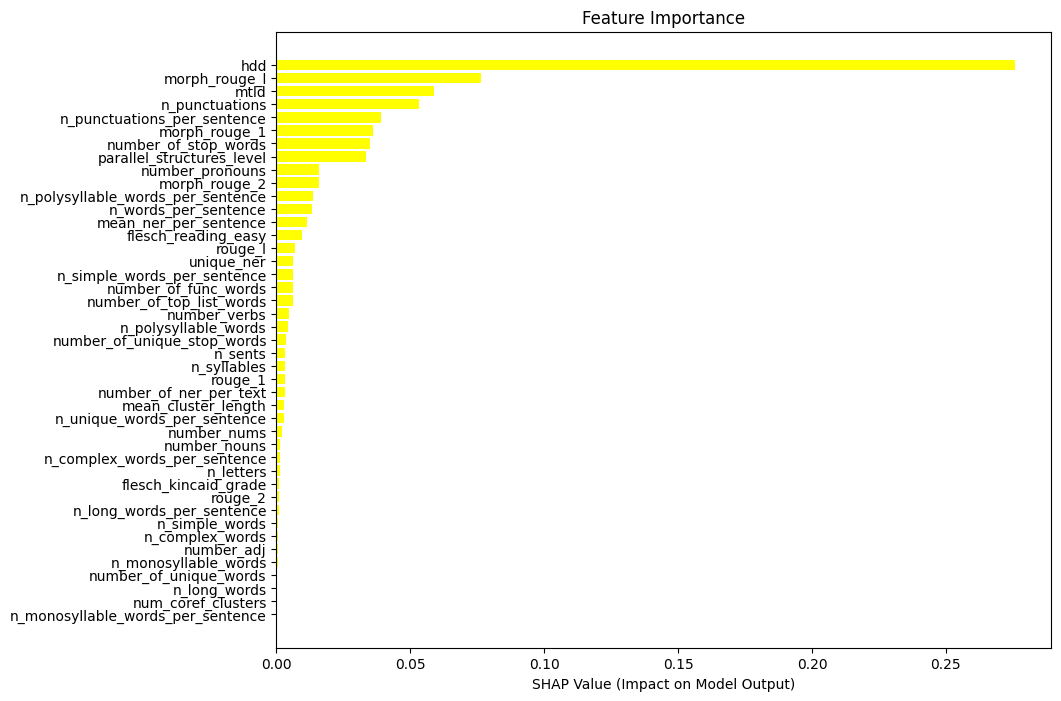

In [87]:
importance_equal_essay_rf = pd.Series(np.abs(shap_values_equal_essay_rf[0]).mean(axis=1), index=equal_df_news.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_equal_essay_rf.index, importance_equal_essay_rf.values, color='yellow')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('Feature Importance')

plt.show()

### **Equal train news**

In [32]:
equal_rf_news = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300,  random_state=42)
equal_rf_news.fit(equal_df_news, class_equal_news)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [33]:
y_pred_equal_essay = equal_rf_news.predict(equal_df_essay)
print("Classification Report:")
print(classification_report(class_equal_essay, y_pred_equal_essay))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1257
           1       0.88      0.87      0.88      1452

    accuracy                           0.87      2709
   macro avg       0.87      0.87      0.87      2709
weighted avg       0.87      0.87      0.87      2709



In [34]:
y_pred_equal_blogs_2 = equal_rf_news.predict(equal_df_blogs)
print("Classification Report:")
print(classification_report(class_equal_blogs, y_pred_equal_blogs_2))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1386
           1       0.80      0.80      0.80      1619

    accuracy                           0.78      3005
   macro avg       0.78      0.78      0.78      3005
weighted avg       0.78      0.78      0.78      3005



### **Equal train blogs**

In [35]:
equal_rf_blogs = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300,  random_state=42)
equal_rf_blogs.fit(equal_df_blogs, class_equal_blogs)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [36]:
y_pred_equal_essay_2 = equal_rf_blogs.predict(equal_df_essay)
print("Classification Report:")
print(classification_report(class_equal_essay, y_pred_equal_essay_2))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1257
           1       0.94      0.90      0.92      1452

    accuracy                           0.91      2709
   macro avg       0.91      0.92      0.91      2709
weighted avg       0.92      0.91      0.91      2709



In [37]:
y_pred_equal_news_2 = equal_rf_blogs.predict(equal_df_news)
print("Classification Report:")
print(classification_report(class_equal_news, y_pred_equal_news_2))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1433
           1       0.94      0.83      0.88      1814

    accuracy                           0.87      3247
   macro avg       0.87      0.88      0.87      3247
weighted avg       0.88      0.87      0.87      3247



### **Random Forest: different train essay**

In [38]:
different_rf = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300,  random_state=42)
different_rf.fit(different_df_essay, class_different_essay)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)

In [39]:
y_pred_different_blogs = different_rf.predict(different_df_blogs)
print("Classification Report:")
print(classification_report(class_different_blogs, y_pred_different_blogs))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1336
           1       0.81      0.82      0.82      1619

    accuracy                           0.80      2955
   macro avg       0.80      0.80      0.80      2955
weighted avg       0.80      0.80      0.80      2955



In [40]:
y_pred_different_news = different_rf.predict(different_df_news)
print("Classification Report:")
print(classification_report(class_different_news, y_pred_different_news))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1366
           1       0.89      0.85      0.87      1801

    accuracy                           0.85      3167
   macro avg       0.85      0.85      0.85      3167
weighted avg       0.85      0.85      0.85      3167



### **Random Forest: different train news**

In [41]:
different_rf_news = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300,  random_state=42)
different_rf_news.fit(different_df_news, class_different_news)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [42]:
y_pred_different_essay = different_rf_news.predict(different_df_essay)
print("Classification Report:")
print(classification_report(class_different_essay, y_pred_different_essay))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       616
           1       0.85      0.88      0.86       740

    accuracy                           0.85      1356
   macro avg       0.85      0.85      0.85      1356
weighted avg       0.85      0.85      0.85      1356



In [43]:
y_pred_different_blogs_2 = different_rf_news.predict(different_df_blogs)
print("Classification Report:")
print(classification_report(class_different_blogs, y_pred_different_blogs_2))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1336
           1       0.79      0.80      0.80      1619

    accuracy                           0.78      2955
   macro avg       0.77      0.77      0.77      2955
weighted avg       0.78      0.78      0.78      2955



### **Random Forest: different train blogs**

In [44]:
different_rf_blogs = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300,  random_state=42)
different_rf_blogs.fit(different_df_blogs, class_different_blogs)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [45]:
y_pred_different_essay_2 = different_rf_blogs.predict(different_df_essay)
print("Classification Report:")
print(classification_report(class_different_essay, y_pred_different_essay_2))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       616
           1       0.94      0.93      0.94       740

    accuracy                           0.93      1356
   macro avg       0.93      0.93      0.93      1356
weighted avg       0.93      0.93      0.93      1356



In [46]:
y_pred_different_news_2 = different_rf_blogs.predict(different_df_news)
print("Classification Report:")
print(classification_report(class_different_news, y_pred_different_news_2))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1366
           1       0.95      0.81      0.88      1801

    accuracy                           0.87      3167
   macro avg       0.87      0.88      0.87      3167
weighted avg       0.88      0.87      0.87      3167



### **CatBoost: equal train essay**

In [47]:
catboost_model_equal = CatBoostClassifier(depth=6, learning_rate=0.1, verbose=False, random_state=42)
catboost_model_equal.fit(equal_df_essay, class_equal_essay)

In [48]:
catboost_pred_equal_news = catboost_model_equal.predict(equal_df_news)

print(classification_report(class_equal_news, catboost_pred_equal_news))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1433
           1       0.92      0.93      0.92      1814

    accuracy                           0.91      3247
   macro avg       0.91      0.91      0.91      3247
weighted avg       0.91      0.91      0.91      3247



In [49]:
catboost_pred_equal_blogs = catboost_model_equal.predict(equal_df_blogs)

print(classification_report(class_equal_blogs, catboost_pred_equal_blogs))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1386
           1       0.84      0.87      0.85      1619

    accuracy                           0.84      3005
   macro avg       0.84      0.84      0.84      3005
weighted avg       0.84      0.84      0.84      3005



### **CatBoost: equal train news**

In [50]:
catboost_model_equal_news = CatBoostClassifier(depth=4, learning_rate=0.1, verbose=False, random_state=42)
catboost_model_equal_news.fit(equal_df_news, class_equal_news)

In [51]:
catboost_pred_equal_blogs_2 = catboost_model_equal_news.predict(equal_df_blogs)

print(classification_report(class_equal_blogs, catboost_pred_equal_blogs_2))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1386
           1       0.83      0.84      0.83      1619

    accuracy                           0.82      3005
   macro avg       0.82      0.82      0.82      3005
weighted avg       0.82      0.82      0.82      3005



In [52]:
catboost_pred_equal_essay = catboost_model_equal_news.predict(equal_df_essay)

print(classification_report(class_equal_essay, catboost_pred_equal_essay))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1257
           1       0.92      0.92      0.92      1452

    accuracy                           0.92      2709
   macro avg       0.92      0.92      0.92      2709
weighted avg       0.92      0.92      0.92      2709



### **CatBoost: equal train blogs**

In [53]:
catboost_model_equal_blogs = CatBoostClassifier(depth=4, learning_rate=0.1, verbose=False, random_state=42)
catboost_model_equal_blogs.fit(equal_df_blogs, class_equal_blogs)

In [54]:
catboost_pred_equal_news_2 = catboost_model_equal_blogs.predict(equal_df_news)

print(classification_report(class_equal_news, catboost_pred_equal_news_2))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1433
           1       0.94      0.87      0.90      1814

    accuracy                           0.90      3247
   macro avg       0.89      0.90      0.90      3247
weighted avg       0.90      0.90      0.90      3247



In [55]:
catboost_pred_equal_essay_2 = catboost_model_equal_blogs.predict(equal_df_essay)

print(classification_report(class_equal_essay, catboost_pred_equal_essay_2))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1257
           1       0.90      0.90      0.90      1452

    accuracy                           0.89      2709
   macro avg       0.89      0.89      0.89      2709
weighted avg       0.89      0.89      0.89      2709



### **Catboost: different train essay**

In [56]:
catboost_model_different = CatBoostClassifier(depth=6, learning_rate=0.1, verbose=False, random_state=42)
catboost_model_different.fit(different_df_essay, class_different_essay)

In [57]:
catboost_pred_different_news = catboost_model_different.predict(different_df_news)

print(classification_report(class_different_news, catboost_pred_different_news))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1366
           1       0.91      0.91      0.91      1801

    accuracy                           0.90      3167
   macro avg       0.90      0.90      0.90      3167
weighted avg       0.90      0.90      0.90      3167



In [58]:
catboost_pred_different_blogs = catboost_model_different.predict(different_df_blogs)

print(classification_report(class_different_blogs, catboost_pred_different_blogs))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1336
           1       0.84      0.86      0.85      1619

    accuracy                           0.84      2955
   macro avg       0.83      0.83      0.83      2955
weighted avg       0.84      0.84      0.84      2955



### **Catboost: different train news**

In [59]:
catboost_model_different_news = CatBoostClassifier(depth=6, learning_rate=0.1, verbose=False, random_state=42)
catboost_model_different_news.fit(different_df_news, class_different_news)

In [60]:
catboost_pred_different_essay = catboost_model_different_news.predict(different_df_essay)

print(classification_report(class_different_essay, catboost_pred_different_essay))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       616
           1       0.90      0.94      0.92       740

    accuracy                           0.91      1356
   macro avg       0.91      0.91      0.91      1356
weighted avg       0.91      0.91      0.91      1356



In [61]:
catboost_pred_different_blogs = catboost_model_different_news.predict(different_df_blogs)

print(classification_report(class_different_blogs, catboost_pred_different_blogs))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1336
           1       0.83      0.84      0.84      1619

    accuracy                           0.82      2955
   macro avg       0.82      0.82      0.82      2955
weighted avg       0.82      0.82      0.82      2955



### **Catboost: different train blogs**

In [62]:
catboost_model_different_blogs = CatBoostClassifier(depth=6, learning_rate=0.1, verbose=False, random_state=42)
catboost_model_different_blogs.fit(different_df_blogs, class_different_blogs)

In [63]:
catboost_pred_different_essay_2 = catboost_model_different_blogs.predict(different_df_essay)

print(classification_report(class_different_essay, catboost_pred_different_essay_2))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       616
           1       0.92      0.96      0.94       740

    accuracy                           0.93      1356
   macro avg       0.93      0.93      0.93      1356
weighted avg       0.93      0.93      0.93      1356



In [64]:
catboost_pred_different_news_2 = catboost_model_different_blogs.predict(different_df_news)

print(classification_report(class_different_news, catboost_pred_different_news_2))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1366
           1       0.95      0.86      0.91      1801

    accuracy                           0.90      3167
   macro avg       0.90      0.90      0.90      3167
weighted avg       0.90      0.90      0.90      3167



### **XGBoost Classifier: equal train essay**

In [65]:
xgboost_model_equal = XGBClassifier(depth=6, learning_rate=0.1, max_depth=4)
xgboost_model_equal.fit(equal_df_essay, class_equal_essay)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, depth=6, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [66]:
xgboost_pred_equal_news = xgboost_model_equal.predict(equal_df_news)

print(classification_report(class_equal_news, xgboost_pred_equal_news))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1433
           1       0.90      0.88      0.89      1814

    accuracy                           0.88      3247
   macro avg       0.88      0.88      0.88      3247
weighted avg       0.88      0.88      0.88      3247



In [67]:
xgboost_pred_equal_blogs = xgboost_model_equal.predict(equal_df_blogs)

print(classification_report(class_equal_blogs, xgboost_pred_equal_blogs))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1386
           1       0.84      0.84      0.84      1619

    accuracy                           0.83      3005
   macro avg       0.83      0.83      0.83      3005
weighted avg       0.83      0.83      0.83      3005



### **XGBoost Classifier: equal train news**

In [68]:
xgboost_model_equal_news = XGBClassifier(learning_rate=0.1, max_depth=4)
xgboost_model_equal_news.fit(equal_df_news, class_equal_news)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
xgboost_pred_equal_essay = xgboost_model_equal_news.predict(equal_df_essay)

print(classification_report(class_equal_essay, xgboost_pred_equal_essay))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1257
           1       0.91      0.90      0.90      1452

    accuracy                           0.90      2709
   macro avg       0.90      0.90      0.90      2709
weighted avg       0.90      0.90      0.90      2709



In [70]:
xgboost_pred_equal_blogs_2 = xgboost_model_equal_news.predict(equal_df_blogs)

print(classification_report(class_equal_blogs, xgboost_pred_equal_blogs))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1386
           1       0.84      0.84      0.84      1619

    accuracy                           0.83      3005
   macro avg       0.83      0.83      0.83      3005
weighted avg       0.83      0.83      0.83      3005



### **XGBoost Classifier: equal train blogs**

In [71]:
xgboost_model_equal_blogs = XGBClassifier(learning_rate=0.1, max_depth=4)
xgboost_model_equal_blogs.fit(equal_df_blogs, class_equal_blogs)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
xgboost_pred_equal_essay_2 = xgboost_model_equal_blogs.predict(equal_df_essay)

print(classification_report(class_equal_essay, xgboost_pred_equal_essay_2))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1257
           1       0.91      0.92      0.91      1452

    accuracy                           0.91      2709
   macro avg       0.91      0.91      0.91      2709
weighted avg       0.91      0.91      0.91      2709



In [73]:
xgboost_pred_equal_news_2 = xgboost_model_equal_blogs.predict(equal_df_news)

print(classification_report(class_equal_news, xgboost_pred_equal_news_2))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1433
           1       0.93      0.86      0.89      1814

    accuracy                           0.88      3247
   macro avg       0.88      0.89      0.88      3247
weighted avg       0.89      0.88      0.88      3247



### **XGBoost: different train essay**

In [74]:
xgboost_model_different = XGBClassifier(learning_rate=0.1, max_depth=4)
xgboost_model_different.fit(different_df_essay, class_different_essay)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
xgboost_pred_different_news = xgboost_model_different.predict(different_df_news)

print(classification_report(class_different_news, xgboost_pred_different_news))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1366
           1       0.90      0.87      0.89      1801

    accuracy                           0.87      3167
   macro avg       0.87      0.87      0.87      3167
weighted avg       0.87      0.87      0.87      3167



In [76]:
xgboost_pred_different_blogs = xgboost_model_different.predict(different_df_blogs)

print(classification_report(class_different_blogs, xgboost_pred_different_blogs))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1336
           1       0.84      0.83      0.83      1619

    accuracy                           0.82      2955
   macro avg       0.81      0.81      0.81      2955
weighted avg       0.82      0.82      0.82      2955



### **XGBoost: different train news**

In [77]:
xgboost_model_different_news = XGBClassifier(learning_rate=0.1, max_depth=4)
xgboost_model_different_news.fit(different_df_news, class_different_news)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
xgboost_pred_different_essay = xgboost_model_different_news.predict(different_df_essay)

print(classification_report(class_different_essay, xgboost_pred_different_essay))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       616
           1       0.87      0.92      0.89       740

    accuracy                           0.88      1356
   macro avg       0.88      0.88      0.88      1356
weighted avg       0.88      0.88      0.88      1356



In [79]:
xgboost_pred_different_blogs_2 = xgboost_model_different_news.predict(different_df_blogs)

print(classification_report(class_different_blogs, xgboost_pred_different_blogs_2))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1336
           1       0.81      0.82      0.82      1619

    accuracy                           0.80      2955
   macro avg       0.79      0.79      0.79      2955
weighted avg       0.80      0.80      0.80      2955



### **XGBoost: different train blogs**

In [80]:
xgboost_model_different_blogs = XGBClassifier(learning_rate=0.1, max_depth=4)
xgboost_model_different_blogs.fit(different_df_blogs, class_different_blogs)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
xgboost_pred_different_essay_2 = xgboost_model_different_blogs.predict(different_df_essay)

print(classification_report(class_different_essay, xgboost_pred_different_essay_2))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       616
           1       0.92      0.96      0.94       740

    accuracy                           0.93      1356
   macro avg       0.93      0.93      0.93      1356
weighted avg       0.93      0.93      0.93      1356



In [82]:
xgboost_pred_different_news_2 = xgboost_model_different_blogs.predict(different_df_news)

print(classification_report(class_different_news, xgboost_pred_different_news_2))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1366
           1       0.94      0.84      0.88      1801

    accuracy                           0.87      3167
   macro avg       0.87      0.88      0.87      3167
weighted avg       0.88      0.87      0.88      3167

